## NLP -  ENTITY PARSING and N-GRAMS
 1. Part of Speech (POS)
 2. Shallow Parsing or Chunking
 3. Named Entity Recognition (NER)
 4. Dependency Parsing
 5. N-Grams
 
Link to dataset: [here](https://www.kaggle.com/snapcrack/all-the-news)

In [1]:
import nltk, re, spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from spacy import displacy
from yellowbrick.text import PosTagVisualizer

import contractions
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
nlp = spacy.load('en_core_web_sm')
#!python -m spacy download en_core_web_sm

In [3]:
# Reading the csv into pandas dataframe
news_articles = pd.read_csv('articles1.csv')
news_articles = news_articles.drop(news_articles.columns[0], axis=1)

nRow, nCol = news_articles.shape
print(f'There are {nRow} row and {nCol} columns')

news_articles.head(2)

There are 50000 row and 9 columns


,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."


In [4]:
# Initializing a new dataframe with only the title column for faster operation

title = news_articles['title'].to_frame()
title.sample(5, random_state=0)

,title
11841,Make England Savage Again! Petition Calls for ...
19602,Russian Track and Field Team Banned from Olymp...
45519,"Disturbing images of the mold, mushrooms, and ..."
25747,Hillary Clinton: When Founders Said All Men We...
42642,Our favorite movie superheroes (and villains)


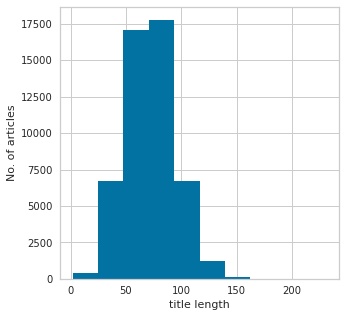

In [6]:
plt.figure(figsize=(5, 5))
plt.xlabel('title length')
plt.ylabel('No. of articles')

title['title'].str.len().hist()

### Part of Speech Tagging

In [7]:
title['title'] = title.title.apply(lambda x: [contractions.fix(word) for word in x.split()])

#join back list of item into one string
title['title'] = [' '.join(map(str, ls)) for ls in title.title] 

# Noise cleaning -spacing, special characters, lowercasing
title['title'] = title.title.apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x.lower()))

# Tokenize
title['tokenized_title'] = title.title.apply(lambda x: word_tokenize(x))

title.sample(5, random_state=0)

,title,tokenized_title
11841,make england savage again petition calls for r...,"[make, england, savage, again, petition, calls..."
19602,russian track and field team banned from olymp...,"[russian, track, and, field, team, banned, fro..."
45519,disturbing images of the mold mushrooms and bu...,"[disturbing, images, of, the, mold, mushrooms,..."
25747,hillary clinton when founders said all men wer...,"[hillary, clinton, when, founders, said, all, ..."
42642,our favorite movie superheroes and villains,"[our, favorite, movie, superheroes, and, villa..."


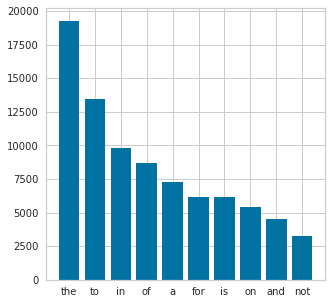

In [8]:
stop_words = set(stopwords.words('english'))

# Before removing let's check the occurrence of stopwords in title

def plot_top_stopwords_barchart(text):
    new = text.str.split().values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop_words: dic[word]+=1
    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*top)
    plt.figure(figsize=(5, 5))
    plt.bar(x, y)
    
plot_top_stopwords_barchart(title['title'])

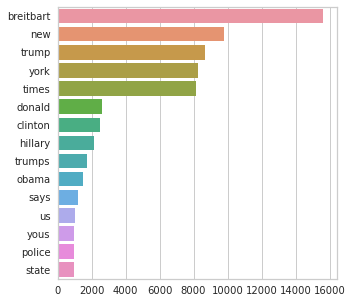

In [9]:
def plot_non_stopwords_barchart(text):
    new = text.str.split().values.tolist()
    corpus = [word for i in new for word in i]
    
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:50]:
        if word not in stop_words:
            x.append(word)
            y.append(count)
    plt.figure(figsize=(5, 5))
    sns.barplot(x=y, y=x)

plot_non_stopwords_barchart(title['title'])

In [10]:
# Now let's remove stopwords
title['tokenized_title'] = title.tokenized_title.apply(lambda x: [word for word in x if word not in stop_words])
title['tokenized_title_join'] = title.tokenized_title.apply(lambda x: ' '.join(map(str, x)))

title.sample(5, random_state=0)

,title,tokenized_title,tokenized_title_join
11841,make england savage again petition calls for r...,"[make, england, savage, petition, calls, radio...",make england savage petition calls radio legen...
19602,russian track and field team banned from olymp...,"[russian, track, field, team, banned, olympics...",russian track field team banned olympics appea...
45519,disturbing images of the mold mushrooms and bu...,"[disturbing, images, mold, mushrooms, bullet, ...",disturbing images mold mushrooms bullet holes ...
25747,hillary clinton when founders said all men wer...,"[hillary, clinton, founders, said, men, create...",hillary clinton founders said men created equa...
42642,our favorite movie superheroes and villains,"[favorite, movie, superheroes, villains]",favorite movie superheroes villains


In [11]:
# Part of Speech Tagging
tagged = []

for l_words in title.tokenized_title.sample(5, random_state=0):
    tagged_words = nltk.pos_tag(l_words)
    tagged.append(tagged_words)
print(tagged)

[[('make', 'NN'), ('england', 'NN'), ('savage', 'NN'), ('petition', 'NN'), ('calls', 'VBZ'), ('radio', 'JJ'), ('legend', 'NN'), ('unbanned', 'VBD'), ('uk', 'JJ'), ('breitbart', 'NN')], [('russian', 'JJ'), ('track', 'NN'), ('field', 'NN'), ('team', 'NN'), ('banned', 'VBD'), ('olympics', 'NNS'), ('appeal', 'JJ'), ('loses', 'NNS'), ('breitbart', 'VBP')], [('disturbing', 'VBG'), ('images', 'NNS'), ('mold', 'VBN'), ('mushrooms', 'NNS'), ('bullet', 'NN'), ('holes', 'VBZ'), ('detroits', 'NNS'), ('schools', 'NNS'), ('led', 'VBD'), ('teachers', 'NNS'), ('massive', 'VBP'), ('sickout', 'NN')], [('hillary', 'JJ'), ('clinton', 'NN'), ('founders', 'NNS'), ('said', 'VBD'), ('men', 'NNS'), ('created', 'VBN'), ('equal', 'JJ'), ('left', 'VBD'), ('women', 'NNS'), ('breitbart', 'VB')], [('favorite', 'JJ'), ('movie', 'NN'), ('superheroes', 'NNS'), ('villains', 'NNS')]]


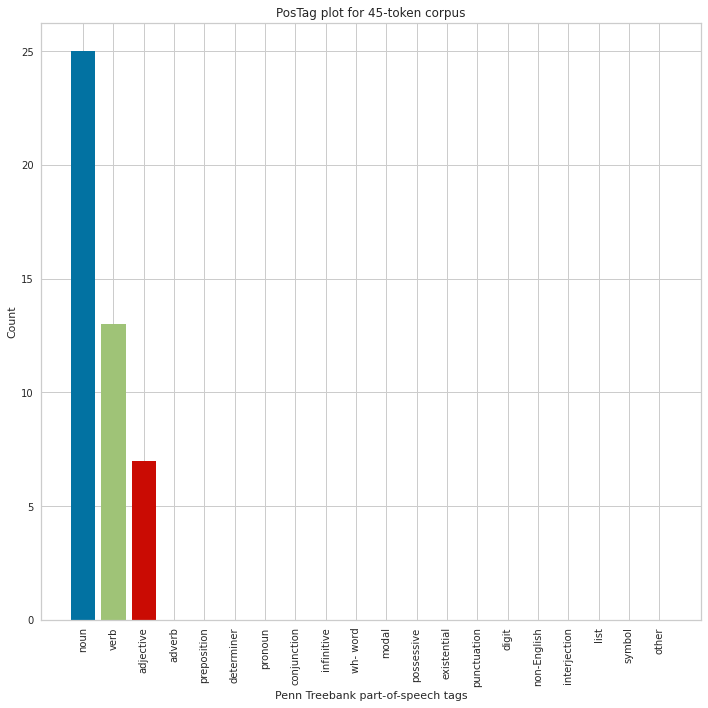

In [13]:
# POS visualizer:yellowbrick

plt.figure(figsize=(10, 10))
viz = PosTagVisualizer()
viz.fit([tagged])
viz.show()

http://www.nltk.org/book/ch05.html
<img src="img.PNG">

## Shallow Parsing or Chunking

In [14]:
for sentence in tagged:
    pattern = "NP: {<DT>?<JJ>*<NN>}" # To be adapt on use case
    NPChunker = nltk.RegexpParser(pattern)
    result = NPChunker.parse(sentence)
    result.pprint()
    print()

(S
  (NP make/NN)
  (NP england/NN)
  (NP savage/NN)
  (NP petition/NN)
  calls/VBZ
  (NP radio/JJ legend/NN)
  unbanned/VBD
  (NP uk/JJ breitbart/NN))

(S
  (NP russian/JJ track/NN)
  (NP field/NN)
  (NP team/NN)
  banned/VBD
  olympics/NNS
  appeal/JJ
  loses/NNS
  breitbart/VBP)

(S
  disturbing/VBG
  images/NNS
  mold/VBN
  mushrooms/NNS
  (NP bullet/NN)
  holes/VBZ
  detroits/NNS
  schools/NNS
  led/VBD
  teachers/NNS
  massive/VBP
  (NP sickout/NN))

(S
  (NP hillary/JJ clinton/NN)
  founders/NNS
  said/VBD
  men/NNS
  created/VBN
  equal/JJ
  left/VBD
  women/NNS
  breitbart/VB)

(S (NP favorite/JJ movie/NN) superheroes/NNS villains/NNS)



### SpaCy functionalities

In [1]:
# for sentence in title.title.sample(2, random_state=0):
#     sentence_doc = nlp(sentence)
    
#     displacy.render(sentence_doc, style='dep', jupyter=True, minify=True, page=True)


In [16]:
for sentence in title.title.sample(2, random_state=0):
    sentence_doc = nlp(sentence)
    
    for chunk in sentence_doc.noun_chunks:
        print(f'Chunked noun phrases found: {chunk}')
    print()

Chunked noun phrases found: england savage
Chunked noun phrases found: radio legend
Chunked noun phrases found: breitbart

Chunked noun phrases found: russian track and field team
Chunked noun phrases found: olympics
Chunked noun phrases found: appeal
Chunked noun phrases found:  breitbart



### Named Entity Recognition (NER) with SpaCy also explore Stanford NER

In [18]:
for sentence in title.title.sample(2, random_state=0):
    sentence_doc = nlp(sentence)
    print(f'Sentence is: {sentence_doc}')
    
    displacy.render(sentence_doc, style='ent', jupyter=True)

Sentence is: make england savage again petition calls for radio legend to be unbanned from uk  breitbart


Sentence is: russian track and field team banned from olympics after appeal loses  breitbart


In [23]:
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm", disable=['parser', 'textcat'])

frames = []

In [27]:
for i in tqdm(range(1000)):
    doc = news_articles.loc[i, 'content']
    text_id = news_articles.loc[i, 'id']
    doc = nlp(doc)
    
    ents = [(e.text, e.start, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' --')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

100%|██████████| 1000/1000 [02:42<00:00,  6.16it/s]


In [28]:
ner = pd.concat(frames)
ner.columns = ['Text', 'Start', 'Stop', 'NER_Type', 'id']
ner.tail()

,Text,Start,Stop,NER_Type,id
50,French,623,2980,LANGUAGE,18417
51,Paris,633,3019,GPE,18417
52,France,635,3030,GPE,18417
53,France,641,3053,GPE,18417
54,third,645,3069,ORDINAL,18417


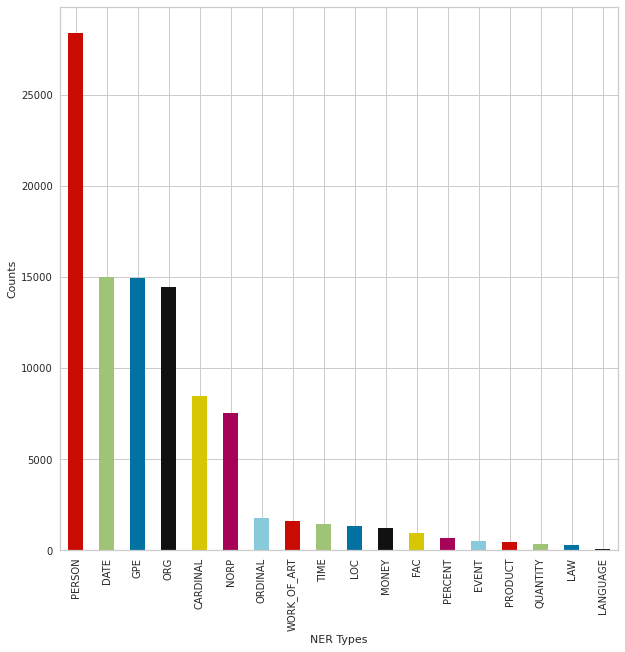

In [29]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color=color_list)

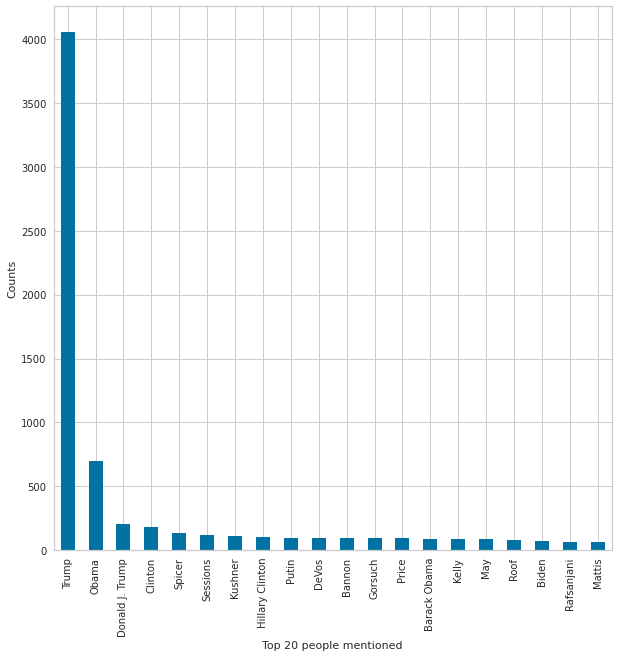

In [30]:
person = ner[ner.NER_Type == 'PERSON']

plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

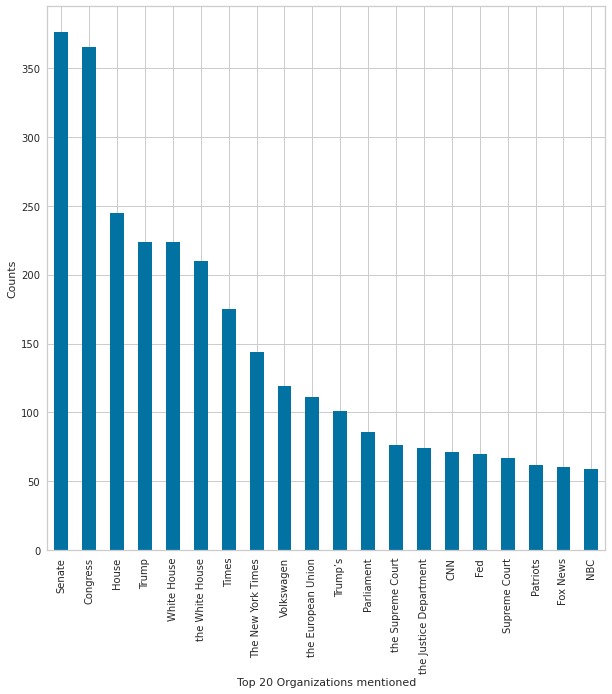

In [31]:
orgs = ner[ner.NER_Type == 'ORG']

plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs.Text.value_counts()[:20].plot(kind='bar')

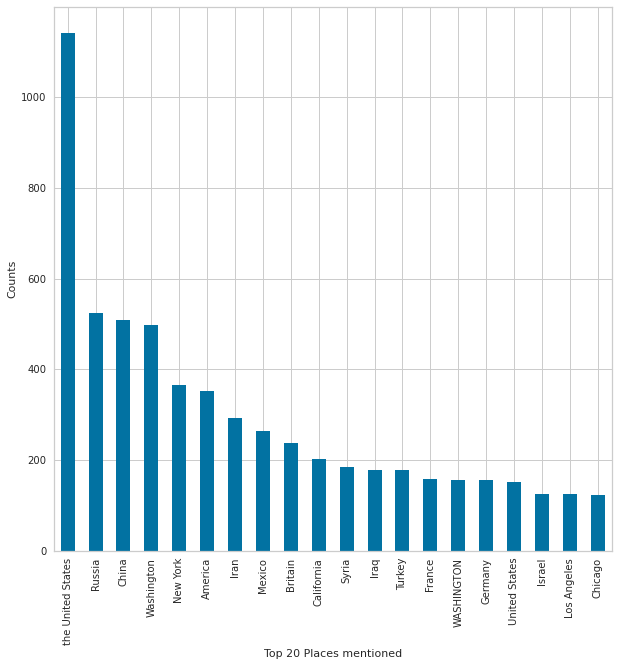

In [32]:
place = ner[ner.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place.Text.value_counts()[:20].plot(kind='bar')

## N-Grams Extraction

In [33]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

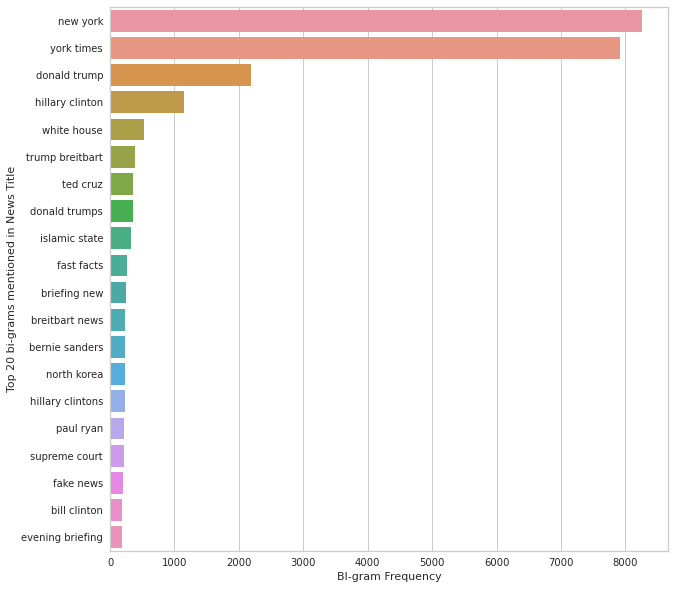

In [34]:
def plot_top_ngrams_barchart(text, n=2, size=str):
    new = text.str.split().values.tolist()
    corpus = [word for i in new for word in i]
    
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:20]
    
    top_n_bigrams = _get_top_ngram(text, n)
    x, y = map(list, zip(*top_n_bigrams))
    plt.figure(figsize=(10, 10))
    plt.xlabel(f'{size.upper()}-gram Frequency')
    plt.ylabel(f'Top 20 {size.lower()}-grams mentioned in News Title')
    sns.barplot(x=y, y=x)
    
plot_top_ngrams_barchart(title['tokenized_title_join'], n=2, size='Bi')

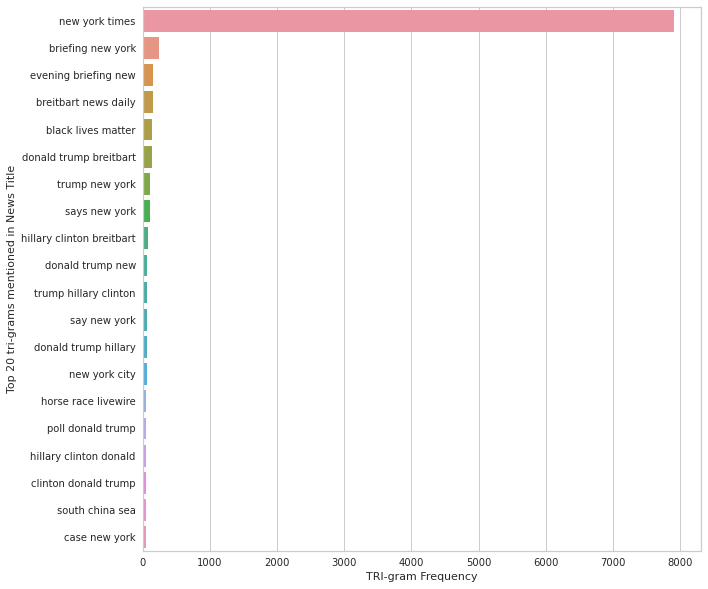

In [35]:
plot_top_ngrams_barchart(title['tokenized_title_join'], n=3, size='Tri')

**References**

 1. https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
 2. https://towardsdatascience.com/how-i-used-natural-language-processing-to-extract-context-from-news-headlines-df2cf5181ca6
 3. https://towardsdatascience.com/how-i-improved-my-text-classification-model-with-feature-engineering-98fbe6c13ef3
 4. https://www.nltk.org/book/ch08.html
 5. https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da